In [1]:
import os
import glob
import time
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from externel import seaborn as sns

def bin_CT(img, n_bins=1024):
#     data_vector = np.ravel(img)
    data_max = np.amax(data_vector)
    data_min = np.amin(data_vector)
    # print(data_max, data_min)
    data_squeezed = (data_vector-data_min)/(data_max-data_min)
    data_extended = data_squeezed * n_bins
    data_discrete = data_extended // 1
#     print(data_discrete.shape)
    return np.asarray(list(data_discrete), dtype=np.int64)

train_dict = {}
train_dict["time_stamp"] = time.strftime("%Y-%m-%d_%H:%M:%S", time.localtime())
train_dict["project_name"] = "pixel_correlation"
train_dict["save_folder"] = "./project_dir/"+train_dict["project_name"]+"/"

train_dict["folder_X"] = "./data_dir/norm_MR/discrete/"
train_dict["folder_Y"] = "./data_dir/norm_CT/discrete/"

X_list = sorted(glob.glob(train_dict["folder_X"]+"*.nii.gz"))
Y_list = sorted(glob.glob(train_dict["folder_Y"]+"*.nii.gz"))
print(Y_list[:5])

['./data_dir/norm_CT/discrete/NORM_001.nii.gz', './data_dir/norm_CT/discrete/NORM_002.nii.gz', './data_dir/norm_CT/discrete/NORM_003.nii.gz', './data_dir/norm_CT/discrete/NORM_004.nii.gz', './data_dir/norm_CT/discrete/NORM_005.nii.gz']


In [3]:
from scipy.special import kl_div
from sklearn.metrics import mean_squared_error as mse

def kl_div_scalar(X, Y):
    return np.sum(kl_div(X, Y))

In [14]:
n_bin = 128
loc_x, loc_y, loc_z = (194, 126, 80)
dx, dy, dz = (1, 1, 1)
n_X = 20
n_Y = 5
dist_X = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))
dist_Y = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))
src_file = nib.load("./data_dir/norm_MR/NORM_097.nii.gz")
src_data = src_file.get_fdata()
dst_data = np.zeros((256, 256))

In [17]:
for px in range(256):
    for py in range(256):
        print(px, py)
        dst_data[px, py] = spatial_pred(px, py, 80, src_data[px, py, 80])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


5 196
5 197
5 198
5 199
5 200
5 201
5 202
5 203
5 204
5 205
5 206
5 207
5 208
5 209
5 210
5 211
5 212
5 213
5 214
5 215
5 216
5 217
5 218
5 219
5 220
5 221
5 222
5 223
5 224
5 225
5 226
5 227
5 228
5 229
5 230
5 231
5 232
5 233
5 234
5 235
5 236
5 237
5 238
5 239
5 240
5 241
5 242
5 243
5 244
5 245
5 246
5 247
5 248
5 249
5 250
5 251
5 252
5 253
5 254
5 255
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 84
6 85
6 86
6 87
6 88
6 89
6 90
6 91
6 92
6 93
6 94
6 95
6 96
6 97
6 98
6 99
6 100
6 101
6 102
6 103
6 104
6 105
6 106
6 107
6 108
6 109
6 110
6 111
6 112
6 113
6 114
6 115
6 116
6 117
6 118
6 119
6 120
6 121
6 122
6 123
6 124


11 77
11 78
11 79
11 80
11 81
11 82
11 83
11 84
11 85
11 86
11 87
11 88
11 89
11 90
11 91
11 92
11 93
11 94
11 95
11 96
11 97
11 98
11 99
11 100
11 101
11 102
11 103
11 104
11 105
11 106
11 107
11 108
11 109
11 110
11 111
11 112
11 113
11 114
11 115
11 116
11 117
11 118
11 119
11 120
11 121
11 122
11 123
11 124
11 125
11 126
11 127
11 128
11 129
11 130
11 131
11 132
11 133
11 134
11 135
11 136
11 137
11 138
11 139
11 140
11 141
11 142
11 143
11 144
11 145
11 146
11 147
11 148
11 149
11 150
11 151
11 152
11 153
11 154
11 155
11 156
11 157
11 158
11 159
11 160
11 161
11 162
11 163
11 164
11 165
11 166
11 167
11 168
11 169
11 170
11 171
11 172
11 173
11 174
11 175
11 176
11 177
11 178
11 179
11 180
11 181
11 182
11 183
11 184
11 185
11 186
11 187
11 188
11 189
11 190
11 191
11 192
11 193
11 194
11 195
11 196
11 197
11 198
11 199
11 200
11 201
11 202
11 203
11 204
11 205
11 206
11 207
11 208
11 209
11 210
11 211
11 212
11 213
11 214
11 215
11 216
11 217
11 218
11 219
11 220
11 221
11 222
1

16 41
16 42
16 43
16 44
16 45
16 46
16 47
16 48
16 49
16 50
16 51
16 52
16 53
16 54
16 55
16 56
16 57
16 58
16 59
16 60
16 61
16 62
16 63
16 64
16 65
16 66
16 67
16 68
16 69
16 70
16 71
16 72
16 73
16 74
16 75
16 76
16 77
16 78
16 79
16 80
16 81
16 82
16 83
16 84
16 85
16 86
16 87
16 88
16 89
16 90
16 91
16 92
16 93
16 94
16 95
16 96
16 97
16 98
16 99
16 100
16 101
16 102
16 103
16 104
16 105
16 106
16 107
16 108
16 109
16 110
16 111
16 112
16 113
16 114
16 115
16 116
16 117
16 118
16 119
16 120
16 121
16 122
16 123
16 124
16 125
16 126
16 127
16 128
16 129
16 130
16 131
16 132
16 133
16 134
16 135
16 136
16 137
16 138
16 139
16 140
16 141
16 142
16 143
16 144
16 145
16 146
16 147
16 148
16 149
16 150
16 151
16 152
16 153
16 154
16 155
16 156
16 157
16 158
16 159
16 160
16 161
16 162
16 163
16 164
16 165
16 166
16 167
16 168
16 169
16 170
16 171
16 172
16 173
16 174
16 175
16 176
16 177
16 178
16 179
16 180
16 181
16 182
16 183
16 184
16 185
16 186
16 187
16 188
16 189
16 190
16 191
16

21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
21 20
21 21
21 22
21 23
21 24
21 25
21 26
21 27
21 28
21 29
21 30
21 31
21 32
21 33
21 34
21 35
21 36
21 37
21 38
21 39
21 40
21 41
21 42
21 43
21 44
21 45
21 46
21 47
21 48
21 49
21 50
21 51
21 52
21 53
21 54
21 55
21 56
21 57
21 58
21 59
21 60
21 61
21 62
21 63
21 64
21 65
21 66
21 67
21 68
21 69
21 70
21 71
21 72
21 73
21 74
21 75
21 76
21 77
21 78
21 79
21 80
21 81
21 82
21 83
21 84
21 85
21 86
21 87
21 88
21 89
21 90
21 91
21 92
21 93
21 94
21 95
21 96
21 97
21 98
21 99
21 100
21 101
21 102
21 103
21 104
21 105
21 106
21 107
21 108
21 109
21 110
21 111
21 112
21 113
21 114
21 115
21 116
21 117
21 118
21 119
21 120
21 121
21 122
21 123
21 124
21 125
21 126
21 127
21 128
21 129
21 130
21 131
21 132
21 133
21 134
21 135
21 136
21 137
21 138
21 139
21 140
21 141
21 142
21 143
21 144
21 145
21 146
21 147
21 148
21 149
21 150
21 151
21 152
21 153
21 154
21 155
21 156
21 157
21 158
21 159
21 160
21 

25 228
25 229
25 230
25 231
25 232
25 233
25 234
25 235
25 236
25 237
25 238
25 239
25 240
25 241
25 242
25 243
25 244
25 245
25 246
25 247
25 248
25 249
25 250
25 251
25 252
25 253
25 254
25 255
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 20
26 21
26 22
26 23
26 24
26 25
26 26
26 27
26 28
26 29
26 30
26 31
26 32
26 33
26 34
26 35
26 36
26 37
26 38
26 39
26 40
26 41
26 42
26 43
26 44
26 45
26 46
26 47
26 48
26 49
26 50
26 51
26 52
26 53
26 54
26 55
26 56
26 57
26 58
26 59
26 60
26 61
26 62
26 63
26 64
26 65
26 66
26 67
26 68
26 69
26 70
26 71
26 72
26 73
26 74
26 75
26 76
26 77
26 78
26 79
26 80
26 81
26 82
26 83
26 84
26 85
26 86
26 87
26 88
26 89
26 90
26 91
26 92
26 93
26 94
26 95
26 96
26 97
26 98
26 99
26 100
26 101
26 102
26 103
26 104
26 105
26 106
26 107
26 108
26 109
26 110
26 111
26 112
26 113
26 114
26 115
26 116
26 117
26 118
26 119
26 120
26 121
26 122
26 123
26 124
26 125
26 126
26 127
26 128
26 129
26 1

KeyboardInterrupt: 

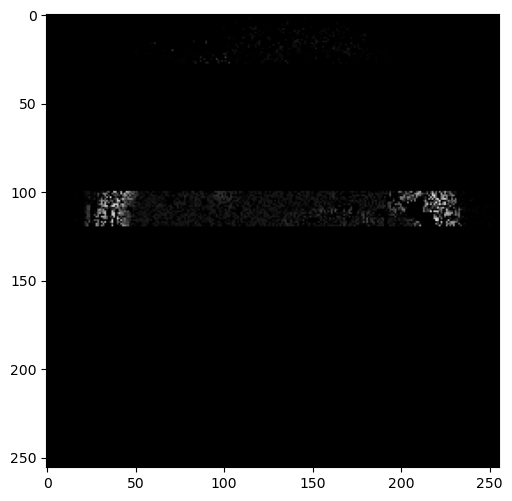

In [22]:
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(dst_data, cmap='gray')

In [21]:
for ipx in range(10):
    for ipy in range(256):
        px = ipx + 110
        py = ipy
        print(px, py)
        dst_data[px, py] = spatial_pred(px, py, 80, src_data[px, py, 80])

110 0
110 1
110 2
110 3
110 4
110 5
110 6
110 7
110 8
110 9
110 10
110 11
110 12
110 13
110 14
110 15
110 16
110 17
110 18
110 19
110 20
110 21
110 22
110 23
110 24
110 25
110 26
110 27
110 28
110 29
110 30
110 31
110 32
110 33
110 34
110 35
110 36
110 37
110 38
110 39
110 40
110 41
110 42
110 43
110 44
110 45
110 46
110 47
110 48
110 49
110 50
110 51
110 52
110 53
110 54
110 55
110 56
110 57
110 58
110 59
110 60
110 61
110 62
110 63
110 64
110 65
110 66
110 67
110 68
110 69
110 70
110 71
110 72
110 73
110 74
110 75
110 76
110 77
110 78
110 79
110 80
110 81
110 82
110 83
110 84
110 85
110 86
110 87
110 88
110 89
110 90
110 91
110 92
110 93
110 94
110 95
110 96
110 97
110 98
110 99
110 100
110 101
110 102
110 103
110 104
110 105
110 106
110 107
110 108
110 109
110 110
110 111
110 112
110 113
110 114
110 115
110 116
110 117
110 118
110 119
110 120
110 121
110 122
110 123
110 124
110 125
110 126
110 127
110 128
110 129
110 130
110 131
110 132
110 133
110 134
110 135
110 136
110 137
110 13

114 65
114 66
114 67
114 68
114 69
114 70
114 71
114 72
114 73
114 74
114 75
114 76
114 77
114 78
114 79
114 80
114 81
114 82
114 83
114 84
114 85
114 86
114 87
114 88
114 89
114 90
114 91
114 92
114 93
114 94
114 95
114 96
114 97
114 98
114 99
114 100
114 101
114 102
114 103
114 104
114 105
114 106
114 107
114 108
114 109
114 110
114 111
114 112
114 113
114 114
114 115
114 116
114 117
114 118
114 119
114 120
114 121
114 122
114 123
114 124
114 125
114 126
114 127
114 128
114 129
114 130
114 131
114 132
114 133
114 134
114 135
114 136
114 137
114 138
114 139
114 140
114 141
114 142
114 143
114 144
114 145
114 146
114 147
114 148
114 149
114 150
114 151
114 152
114 153
114 154
114 155
114 156
114 157
114 158
114 159
114 160
114 161
114 162
114 163
114 164
114 165
114 166
114 167
114 168
114 169
114 170
114 171
114 172
114 173
114 174
114 175
114 176
114 177
114 178
114 179
114 180
114 181
114 182
114 183
114 184
114 185
114 186
114 187
114 188
114 189
114 190
114 191
114 192
114 193
114

118 125
118 126
118 127
118 128
118 129
118 130
118 131
118 132
118 133
118 134
118 135
118 136
118 137
118 138
118 139
118 140
118 141
118 142
118 143
118 144
118 145
118 146
118 147
118 148
118 149
118 150
118 151
118 152
118 153
118 154
118 155
118 156
118 157
118 158
118 159
118 160
118 161
118 162
118 163
118 164
118 165
118 166
118 167
118 168
118 169
118 170
118 171
118 172
118 173
118 174
118 175
118 176
118 177
118 178
118 179
118 180
118 181
118 182
118 183
118 184
118 185
118 186
118 187
118 188
118 189
118 190
118 191
118 192
118 193
118 194
118 195
118 196
118 197
118 198
118 199
118 200
118 201
118 202
118 203
118 204
118 205
118 206
118 207
118 208
118 209
118 210
118 211
118 212
118 213
118 214
118 215
118 216
118 217
118 218
118 219
118 220
118 221
118 222
118 223
118 224
118 225
118 226
118 227
118 228
118 229
118 230
118 231
118 232
118 233
118 234
118 235
118 236
118 237
118 238
118 239
118 240
118 241
118 242
118 243
118 244
118 245
118 246
118 247
118 248
118 249


In [16]:
def spatial_pred(loc_x, loc_y, loc_z, source_pixel_value):
    
    dist_X = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))
    dist_Y = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))
    
    for file_path in Y_list[:n_X]:
        Y_file = nib.load(file_path)
        Y_data = Y_file.get_fdata()
        Y_cube = Y_data[loc_x-dx:loc_x+dx+1, loc_y-dy:loc_y+dy+1, loc_z-dz:loc_z+dz+1]
        Y_flat = np.ravel(Y_cube)
        Y_elem = np.unique(Y_cube)
        for cnt_elem, elem in enumerate(Y_elem):
            loc_elem = np.where(Y_flat == elem)[0]
            for idx_elem in loc_elem:
                dist_Y[int(elem), idx_elem] += 1

    Y_nonzero = []
    for idx in range(n_bin):
        row_sum = np.sum(dist_Y[idx, :])
        if row_sum > 0:
            dist_Y[idx, :] /= row_sum
            Y_nonzero.append(idx)


    for file_path in X_list[:n_Y]:
        X_file = nib.load(file_path)
        X_data = X_file.get_fdata()
        X_cube = X_data[loc_x-dx:loc_x+dx+1, loc_y-dy:loc_y+dy+1, loc_z-dz:loc_z+dz+1]
        X_flat = np.ravel(X_cube)
        X_elem = np.unique(X_cube)
        for cnt_elem, elem in enumerate(X_elem):
            loc_elem = np.where(X_flat == elem)[0]
            for idx_elem in loc_elem:
                dist_X[int(elem), idx_elem] += 1

    X_nonzero = []
    for idx in range(n_bin):
        row_sum = np.sum(dist_X[idx, :])
        if row_sum > 0:
            dist_X[idx, :] += 1e-6
            row_sum = np.sum(dist_X[idx, :])
            dist_X[idx, :] /=row_sum
            X_nonzero.append(idx)

    dist_YX = np.zeros((len(X_nonzero), len(Y_nonzero)))
    for cnt_x, elem_X in enumerate(X_nonzero):
        for cnt_y, elem_Y in enumerate(Y_nonzero):
            dist_YX[cnt_x, cnt_y] = kl_div_scalar(dist_Y[elem_Y, :], dist_X[elem_X, :])

    for cnt_x, elem_X in enumerate(X_nonzero):
        Y_dist_x = dist_YX[cnt_x, :]
        Y_minKL = np.amin(Y_dist_x)
        Y_minKL_loc = np.where(Y_dist_x == Y_minKL)[0][0]
        if elem_X == source_pixel_value:
            return Y_minKL_loc
    return 0